<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [125]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

The data is of a series of test conducted by NASA to understand the noise produces by two and three-dimensional airfoil blade sections. 
This data could be used to help optimize the design or use of these blades to reduce noise produced by them. 

- Find out how many rows and columns are in `noise`.

In [126]:
noise.shape

(1503, 6)

- Find out what data types are present.

In [71]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [72]:
noise.isnull().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

In [73]:
noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [77]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

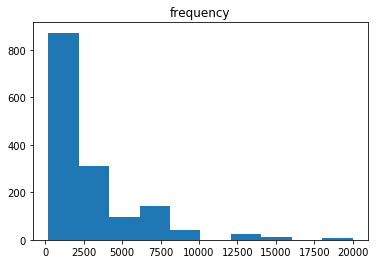

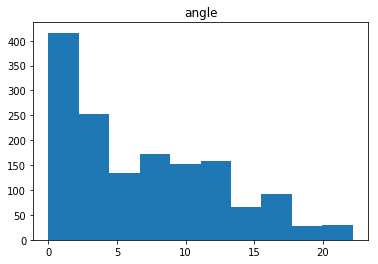

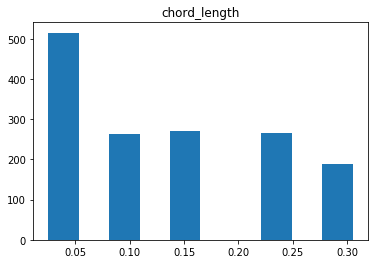

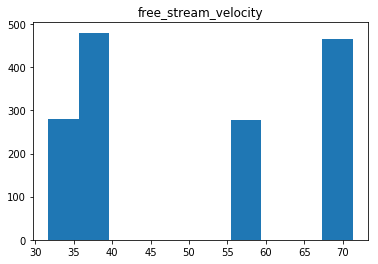

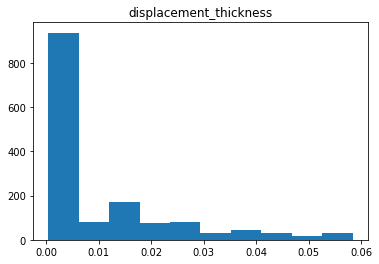

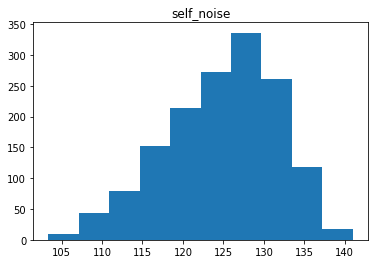

In [79]:
for col in ['frequency', "angle", "chord_length", "free_stream_velocity", "displacement_thickness", "self_noise"]:
    x = noise.loc[:, col]
    fig, ax = plt.subplots()
    ax.hist(x)
    ax.set_title(col)

- Which variables are approximately normally distributed?

Self noise is the only variables that looks somewhat normally distributed 

- Which variables show strong skew?

frequency, angle and displacement thickness have strong skew

- Make a scatterplot of each feature variable with the target variable.

In [80]:
y = noise.loc[:, "self_noise"]

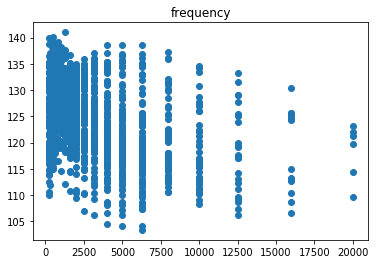

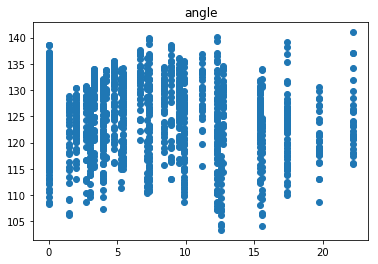

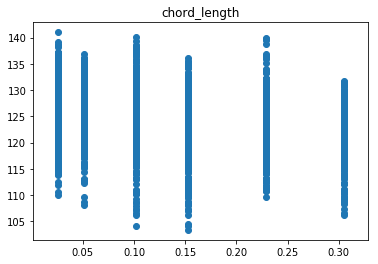

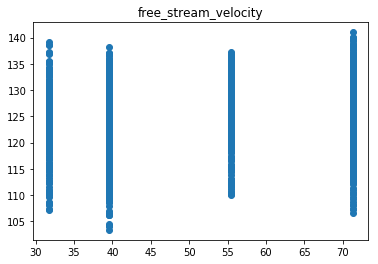

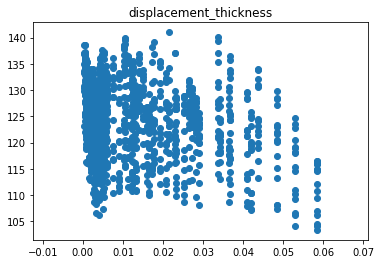

In [81]:
for col in ['frequency', "angle", "chord_length", "free_stream_velocity", "displacement_thickness"]:
    x = noise.loc[:, col]
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_title(col)

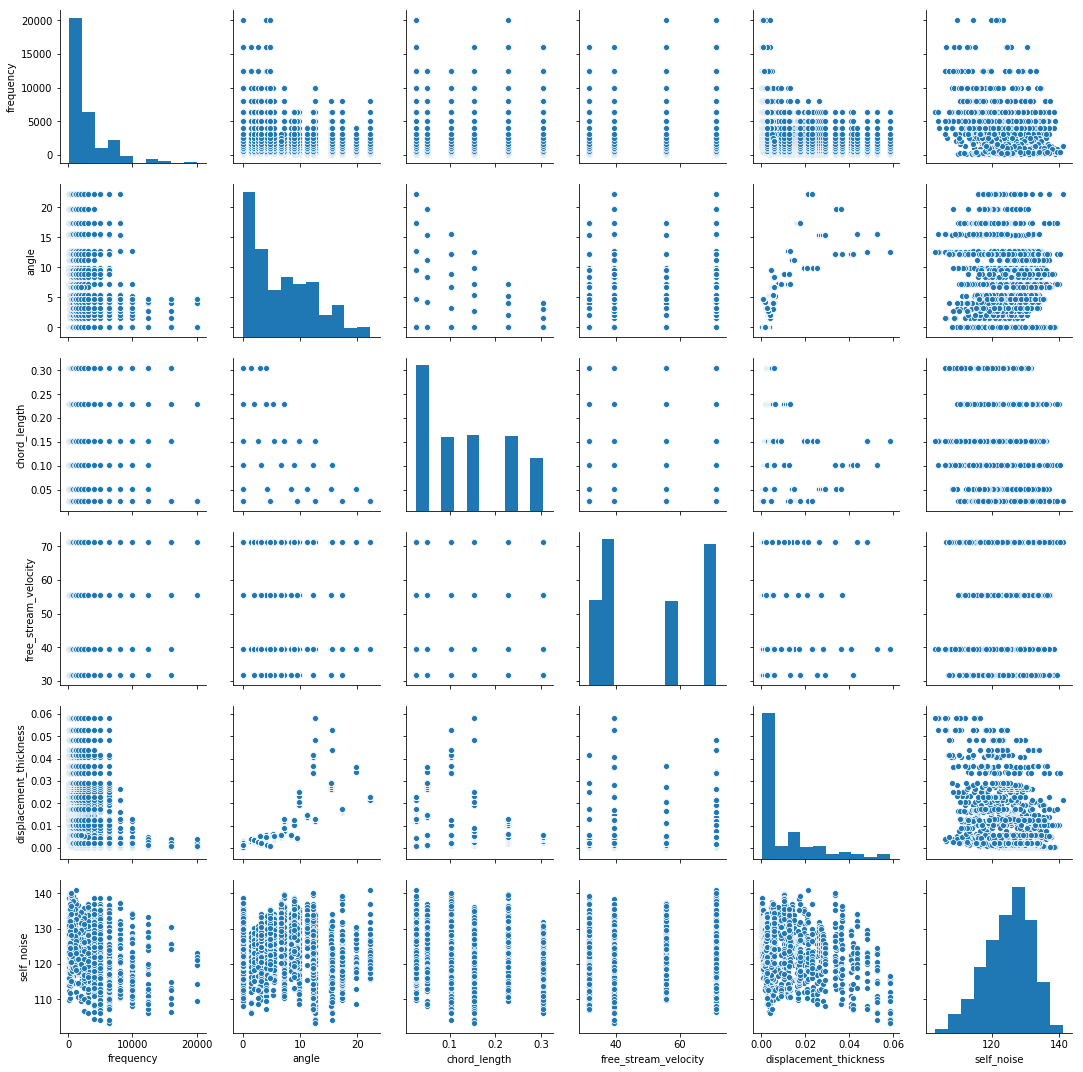

In [40]:
import seaborn as sns
g =sns.pairplot(noise)
#axes = pd.plotting.scatter_matrix(noise.loc[:,:], figsize=(20,20))

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

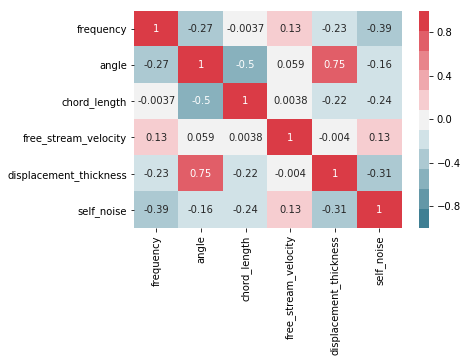

In [27]:
import seaborn as sns
ax=sns.heatmap(noise.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220,10, n=11), annot=True)

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

There isnt really an obvious linear relationship between self_noise and the independent variables 

/Users/andreaflores/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


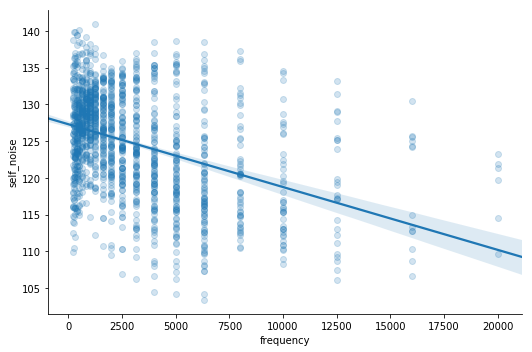

In [88]:
g = sns.lmplot(x="frequency",
              y="self_noise", 
              data=noise,
              aspect=1.5, 
              scatter_kws={"alpha":0.2}
              )

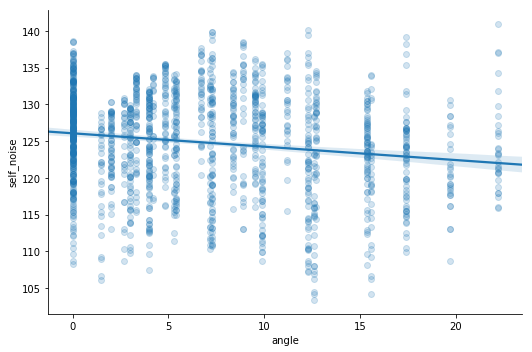

In [89]:
g = sns.lmplot(x="angle",
              y="self_noise", 
              data=noise,
              aspect=1.5, 
              scatter_kws={"alpha":0.2}
              )

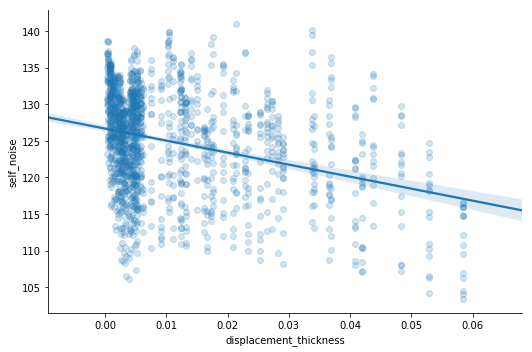

In [90]:
g = sns.lmplot(x="displacement_thickness",
              y="self_noise", 
              data=noise,
              aspect=1.5, 
              scatter_kws={"alpha":0.2}
              )

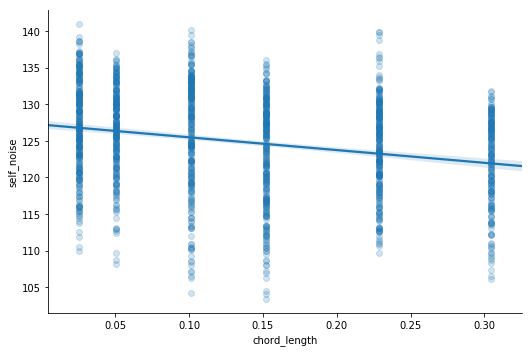

In [91]:
g = sns.lmplot(x="chord_length",
              y="self_noise", 
              data=noise,
              aspect=1.5, 
              scatter_kws={"alpha":0.2}
              )

- Develop a linear regression model to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [127]:
X= noise.drop("self_noise", axis = "columns")
y=noise.loc[:,"self_noise"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=.7, random_state=1)

from sklearn.linear_model import LinearRegression 

lr= LinearRegression()

lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

#list(zip(lr.predict(X_test), y_test))


0.46886409442170374
0.5334675324721334


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Training R2 is equal to .53, meaning the model is accounting for 53% of the variation in the target column. Model is underfitting. There is a bias problem because we are imposing a linear model on data that is does not naturally have the best linear relationships

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

Test R2 is equal to .46, because of the gap between the training and test r2 is relatively small there is not a significant variance problem. We should address the bias issue first.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

It has more of a bias problem, because it has a relatively low R2 aka the model is looking for the wrong kind of shape in our data



- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=.7, random_state=1)

from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9897632649198489
0.9316821056969894


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

The score for the training data is .98 and .93 for the test data. The random forest model has a moderate/small variance problem because of the grap btw the train/test scores. The random forest model is performing significantly better than the regression model - we seem to have eliminated a lot of the bias issue that we had with the linear regression model

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

First trying different combination of features, to see if there is another combination that will increase the R2. 

In [96]:
#we want features that are strongly crrelated with our target feature and not that correlated with each other
noise.corr()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
chord_length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
free_stream_velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
displacement_thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
self_noise,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [93]:
from sklearn import metrics
def train_test_r2(df, feature_cols):
    target_col = "self_noise"
    
    X= df.loc[:, feature_cols]
    y=df.loc[:, target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg=LinearRegression()
    linreg.fit(X_train, y_train)
    
    r2=linreg.score(X_test, y_test)
    return r2

In [95]:
print(train_test_r2(noise, ["angle"]))
print(train_test_r2(noise, ["angle", "frequency"]))
print(train_test_r2(noise, ["angle", "frequency", "chord_length"]))
print(train_test_r2(noise, ["frequency", "free_stream_velocity", "displacement_thickness"]))
print(train_test_r2(noise, ["angle", "frequency", "displacement_thickness"]))


0.024761618358998483
0.25922979532196866
0.4486961661992502
0.3818883616068188
0.3377926758550185


- **BONUS:** Keep going! Find ways to make your model better.

In [42]:
print(noise.loc[:,"free_stream_velocity"].value_counts())
print(noise.loc[:,"chord_length"].value_counts())
#free stream velocity and chord lenght have a small option of possible values - we can turn these into dummy variables to give our model more flexibility

39.6    480
71.3    465
31.7    281
55.5    277
Name: free_stream_velocity, dtype: int64
0.0254    278
0.1524    271
0.2286    266
0.1016    263
0.0508    237
0.3048    188
Name: chord_length, dtype: int64


In [99]:
dummies=pd.get_dummies(noise, columns=["free_stream_velocity", "chord_length"])
dummies.head()

,frequency,angle,displacement_thickness,self_noise,free_stream_velocity_31.7,free_stream_velocity_39.6,free_stream_velocity_55.5,free_stream_velocity_71.3,chord_length_0.0254,chord_length_0.0508,chord_length_0.1016,chord_length_0.1524,chord_length_0.2286,chord_length_0.3048
0,800,0.0,0.002663,126.201,0,0,0,1,0,0,0,0,0,1
1,1000,0.0,0.002663,125.201,0,0,0,1,0,0,0,0,0,1
2,1250,0.0,0.002663,125.951,0,0,0,1,0,0,0,0,0,1
3,1600,0.0,0.002663,127.591,0,0,0,1,0,0,0,0,0,1
4,2000,0.0,0.002663,127.461,0,0,0,1,0,0,0,0,0,1


In [100]:
dummies=dummies.drop("free_stream_velocity_31.7", axis ="columns")
dummies=dummies.drop("chord_length_0.0254", axis ="columns")
dummies.head()

,frequency,angle,displacement_thickness,self_noise,free_stream_velocity_39.6,free_stream_velocity_55.5,free_stream_velocity_71.3,chord_length_0.0508,chord_length_0.1016,chord_length_0.1524,chord_length_0.2286,chord_length_0.3048
0,800,0.0,0.002663,126.201,0,0,1,0,0,0,0,1
1,1000,0.0,0.002663,125.201,0,0,1,0,0,0,0,1
2,1250,0.0,0.002663,125.951,0,0,1,0,0,0,0,1
3,1600,0.0,0.002663,127.591,0,0,1,0,0,0,0,1
4,2000,0.0,0.002663,127.461,0,0,1,0,0,0,0,1


In [101]:
X= dummies.drop("self_noise", axis = "columns")
y=dummies.loc[:,"self_noise"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=.7, random_state=1)

from sklearn.linear_model import LinearRegression 

lr3= LinearRegression()

lr3.fit(X_train, y_train)

print(lr3.score(X_test, y_test))
print(lr3.score(X_train, y_train))

#R2 values went up a bit with this adjustment

0.4735509619988294
0.5437229222886986


In [102]:
#from sklearn.model_selection import cross_val_score

#from sklearn.model_selection import KFold

#kf=KFold(n_splits=5, shuffle=True)

#scores=cross_val_score(estimator=lr4, X=X, y=y, cv=kf)
#scores.mean()

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

In [43]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [44]:
credit.shape

(690, 16)

- Find out what data types are present.

In [45]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 3 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [46]:
#columns 3 is a float not an object when imported:
credit[2]= pd.to_numeric(credit[2], errors="coerce") 

In [47]:
credit.dtypes

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

In [48]:
#credit.loc[:,16]
credit=credit.replace({"+": 1, "-": 0})
credit.loc[:,16].value_counts()

0    383
1    307
Name: 16, dtype: int64

In [49]:
credit.dtypes
#columns 16 no longer an object

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16      int64
dtype: object

In [50]:
credit=credit.replace({"?": np.nan})

- Find out how many null values there are in each columns.

In [51]:
credit.isnull().sum()

1     12
2     12
3      0
4      6
5      6
6      9
7      9
8      0
9      0
10     0
11     0
12     0
13     0
14    13
15     0
16     0
dtype: int64

In [52]:
credit.isna().sum()

1     12
2     12
3      0
4      6
5      6
6      9
7      9
8      0
9      0
10     0
11     0
12     0
13     0
14    13
15     0
16     0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [53]:
credit.describe()

,2,3,8,11,15,16
count,678.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507,0.444928
std,11.957862,4.978163,3.346513,4.86294,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000,0.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,100000.000000,1.000000


In [54]:
credit.describe(include=object)

,1,4,5,6,7,9,10,12,13,14
count,678,684,684,681,681,690,690,690,690,677
unique,2,3,3,14,9,2,2,2,3,170
top,b,u,g,c,v,t,f,f,g,00000
freq,468,519,519,137,399,361,395,374,625,132


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

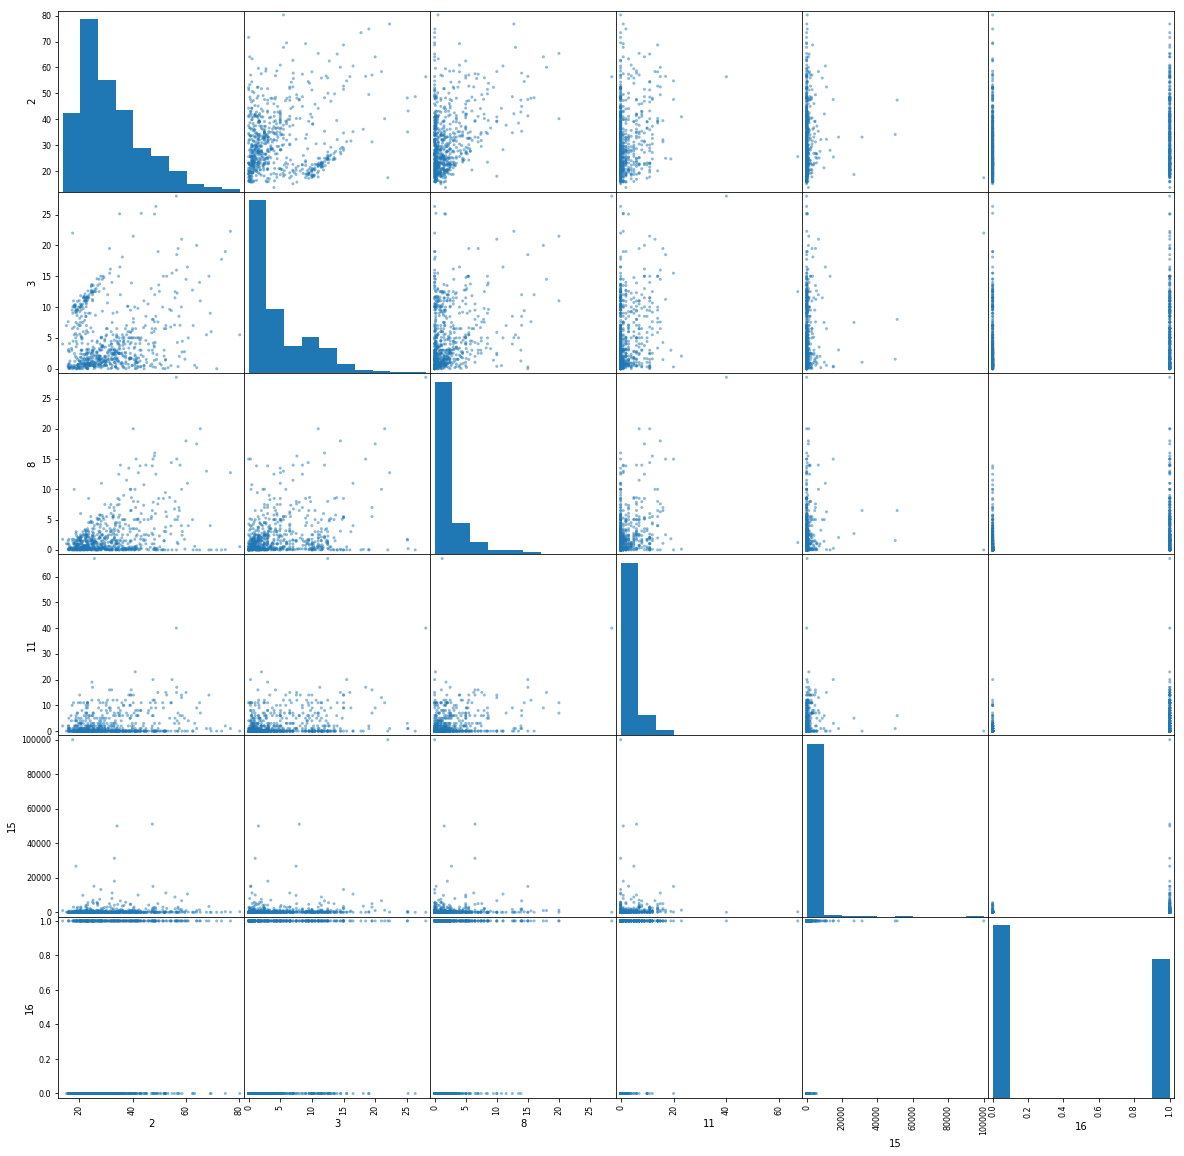

In [15]:
axes = pd.plotting.scatter_matrix(credit.loc[:,:], figsize=(20,20))

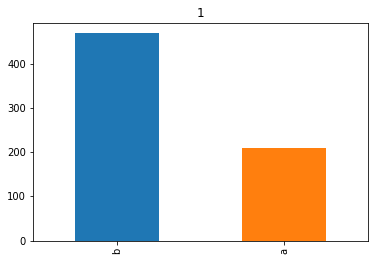

In [55]:
ax1=credit.loc[:,1].value_counts().plot(kind="bar", title="1")

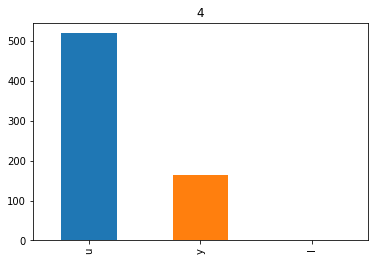

In [56]:
ax4 =credit.loc[:,4].value_counts().plot(kind="bar", title="4")

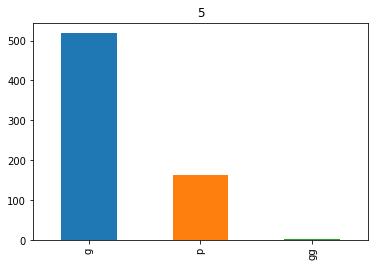

In [147]:
ax5 =credit.loc[:,5].value_counts().plot(kind="bar", title="5")

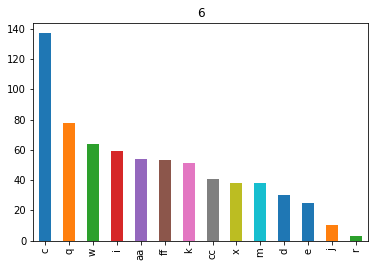

In [148]:
ax6 =credit.loc[:,6].value_counts().plot(kind="bar", title="6")

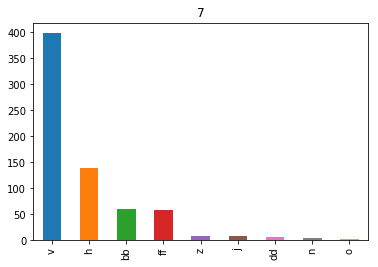

In [149]:
ax7 =credit.loc[:,7].value_counts().plot(kind="bar", title="7")

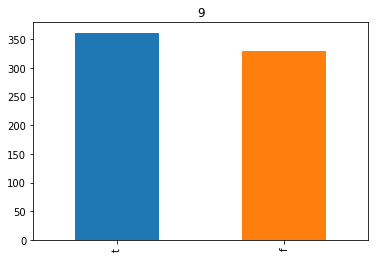

In [152]:
ax9 =credit.loc[:,9].value_counts().plot(kind="bar", title="9")

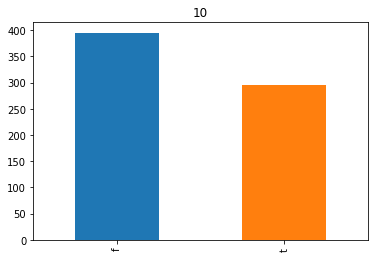

In [153]:
ax10 =credit.loc[:,10].value_counts().plot(kind="bar", title="10")

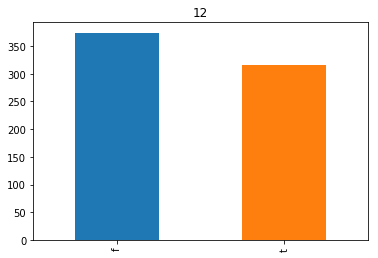

In [154]:
ax12 =credit.loc[:,12].value_counts().plot(kind="bar", title="12")

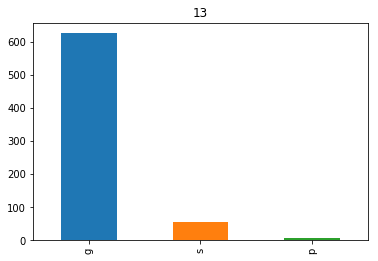

In [157]:
ax13 =credit.loc[:,13].value_counts().plot(kind="bar", title="13")

In [65]:
#credit.loc[:,14].value_counts()
credit[14]= pd.to_numeric(credit[14], errors="coerce") 

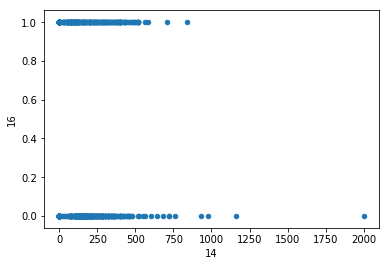

In [66]:
ax14 =credit.plot(kind="scatter", x=14, y=16)

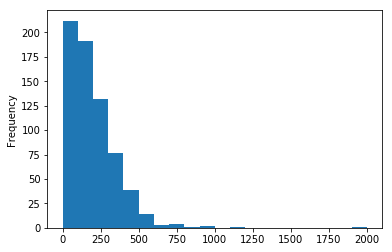

In [67]:
ax =credit.loc[:,14].plot( kind="hist", bins=20)

- Which variables are approximately normally distributed?

None of the numeric variables look normally distributed

- Which variables show strong skew?

all of our  our numeric variables for a strong skew: 2, 3, 8, 11, 15, 14

- Make a scatterplot of each feature variable with the target variable.

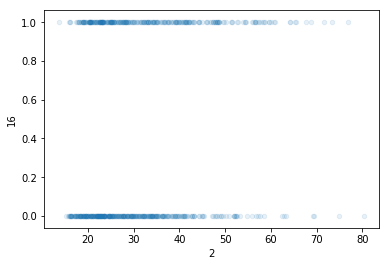

In [60]:
#scatter plot requires x to be numeric, can only do for our numberic variables
ax=credit.plot(kind ="scatter", x=2, y=16, alpha= .1);

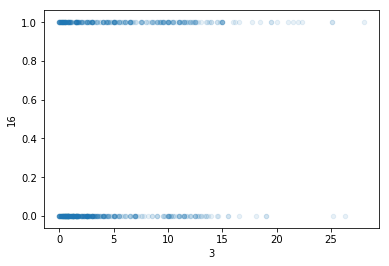

In [32]:
ax=credit.plot(kind ="scatter", x=3, y=16, alpha= .1);

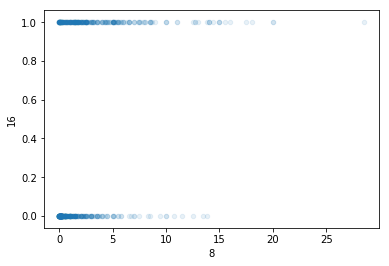

In [33]:
ax=credit.plot(kind ="scatter", x=8, y=16, alpha= .1);

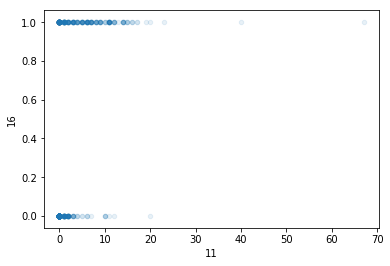

In [34]:
ax=credit.plot(kind ="scatter", x=11, y=16, alpha= .1);

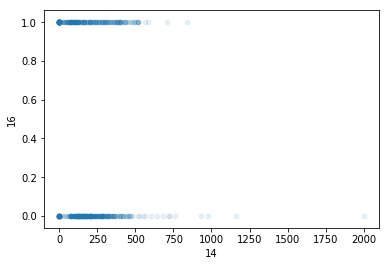

In [68]:
ax=credit.plot(kind ="scatter", x=14, y=16, alpha= .1);

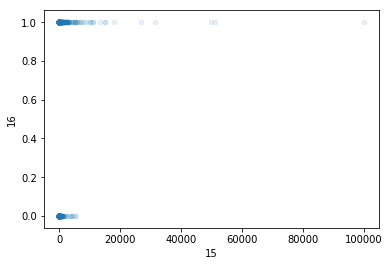

In [36]:
ax=credit.plot(kind ="scatter", x=15, y=16, alpha= .1);

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

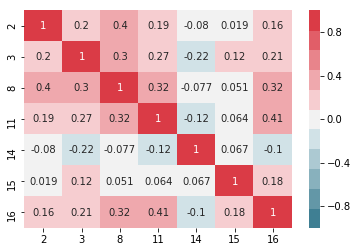

In [61]:
ax=sns.heatmap(credit.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220,10, n=11), annot=True)

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

There are missing values so I will drop those first. 
Will need to create dummies for all categorical variables
A few variables are significantly correlated with each other - will only use on of thsoe in the model.

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [62]:
credit.loc[:,16].value_counts()

0    383
1    307
Name: 16, dtype: int64

The most common outcome is 0/not approved. The value of 0 represents 55% of the total rows so our model needs to have an accuracy of more than .55 in order to be better than a null model 

- Develop a logistic regression model to predict the target variable. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [116]:
#will only include numeric variables for fist pass:

credit1= credit.select_dtypes(["int64", "float"]).dropna(axis="columns")
credit1.dropna(axis=0, inplace=True)


In [117]:
target_col= 16
X=credit1.drop(target_col, axis="columns")
y=credit1.loc[:, target_col]

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=.7, random_state=1)

In [86]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train, y_train)

/Users/andreaflores/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))
#Our model gets the right answer 79% of the time

0.7922705314009661
0.7634854771784232


In [109]:
y_test.value_counts(normalize=True)

0    0.565
1    0.435
Name: 16, dtype: float64

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The score for the test data was .79 and the score for the train data was .76. Both score are relatively good. model has more of a bias problem at this point than a variance problem

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

test= .79 and train=.76. The scores are close to each other which means that the model not overfitting the training data

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

answered above, more of a bias problem 

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=.7, random_state=1)

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100, oob_score=True)

rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9896265560165975
0.7681159420289855


In [124]:
y.value_counts(normalize=True)

0    0.555072
1    0.444928
Name: 16, dtype: float64

- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [95]:
credit.corr()
#2 and 8 are the most correlated - but 8 is the most correlated to the target variable so will drop 2 from the model.

,2,3,8,11,14,15,16
2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553,0.162881
3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121,0.206294
8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345,0.322475
11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692,0.406410
14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853,-0.100935
15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000,0.175657
16,0.162881,0.206294,0.322475,0.406410,-0.100935,0.175657,1.000000


In [96]:
dummies=pd.get_dummies(credit, columns=[1,4,5,6,7,9,10,12,13])
dummies.head()

,2,3,8,11,14,15,16,1_a,1_b,4_l,...,7_z,9_f,9_t,10_f,10_t,12_f,12_t,13_g,13_p,13_s
0,30.83,0.000,1.25,1,202.0,0,1,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43.0,560,1,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280.0,824,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100.0,3,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,1,0,1,0,...,0,0,1,1,0,1,0,0,0,1


In [97]:
dummies.columns

Index([     2,      3,      8,     11,     14,     15,     16,  '1_a',  '1_b',
        '4_l',  '4_u',  '4_y',  '5_g', '5_gg',  '5_p', '6_aa',  '6_c', '6_cc',
        '6_d',  '6_e', '6_ff',  '6_i',  '6_j',  '6_k',  '6_m',  '6_q',  '6_r',
        '6_w',  '6_x', '7_bb', '7_dd', '7_ff',  '7_h',  '7_j',  '7_n',  '7_o',
        '7_v',  '7_z',  '9_f',  '9_t', '10_f', '10_t', '12_f', '12_t', '13_g',
       '13_p', '13_s'],
      dtype='object')

In [98]:
dummies=dummies.drop("1_a", axis ="columns")
dummies=dummies.drop("4_l", axis ="columns")
dummies=dummies.drop("5_g", axis ="columns")
dummies=dummies.drop("6_aa", axis ="columns")
dummies=dummies.drop("7_bb", axis ="columns")
dummies=dummies.drop("9_f", axis ="columns")
dummies=dummies.drop("10_f", axis ="columns")
dummies=dummies.drop("12_f", axis ="columns")
dummies=dummies.drop("13_g", axis ="columns")
dummies.head()

,2,3,8,11,14,15,16,1_b,4_u,4_y,...,7_j,7_n,7_o,7_v,7_z,9_t,10_t,12_t,13_p,13_s
0,30.83,0.000,1.25,1,202.0,0,1,1,1,0,...,0,0,0,1,0,1,1,0,0,0
1,58.67,4.460,3.04,6,43.0,560,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,24.50,0.500,1.50,0,280.0,824,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,27.83,1.540,3.75,5,100.0,3,1,1,1,0,...,0,0,0,1,0,1,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,1,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [107]:
dummies.dropna(axis=0, inplace=True)
target_col= 16
X=dummies.drop([target_col,2], axis="columns")
y=dummies.loc[:, target_col]


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=.7, random_state=1)

lr2=LogisticRegression()

lr2.fit(X_train, y_train)


/Users/andreaflores/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [106]:
print(lr2.score(X_test, y_test))
print(lr2.score(X_train, y_train))

0.87
0.8862660944206009


In [108]:
# when included all dummy variables and dropped 2 (strongly correlated with 8) test score is.87 and train score is .88

- **BONUS:** Keep going! Find ways to make your model better.

In [131]:
#if i had more time i would work on transfomring the variable that are skewed- maybe making them into logs